**Importing all relevant libraries**

In [52]:
#Import libraries and fixing the random state to 42 for entire notebook

#Set the seed value
seed_value=15042

#Set the seed as a local environment variable
import os
os.environ['PYTHONHASHSEED'] = str(seed_value)

# 2. Set `python` built-in pseudo-random generator at a fixed value
import random
random.seed(seed_value)

# 3. Set `numpy` pseudo-random generator at a fixed value
import numpy as np
np.random.seed(seed_value)

#Scientific Compurting Libraries, remove the unnecessary ones later
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import textblob

#Feature engineering, processing and splitting libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LassoCV, RidgeCV, ElasticNetCV
from sklearn.feature_selection import RFE, VarianceThreshold
from sklearn.model_selection import GridSearchCV, KFold, RandomizedSearchCV, StratifiedKFold, cross_val_score
sns.set_context("paper", font_scale = 1, rc={"grid.linewidth": 3})
pd.set_option('display.max_rows', 100, 'display.max_columns', 400)
from scipy.stats import skew,boxcox_normmax
from scipy.special import boxcox1p
from sklearn.pipeline import make_pipeline, Pipeline, FeatureUnion
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor

#Gradient Boosting and Bagging Techniques
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB, ComplementNB

#Text to numerical features - ML algorithms
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

#Sklearn metrics for classification
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

#Undersampling and oversampling
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import RandomOverSampler
from imblearn.combine import SMOTETomek

#Saving models to file
import joblib, pickle

In [54]:
#Text preprocessing libraries
import nltk
from nltk import word_tokenize
from nltk import sent_tokenize
import textblob
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

from collections import Counter, defaultdict
import time
from datetime import datetime
import re

In [55]:
#Initialising the objects
lemmatizer = WordNetLemmatizer()
ps = PorterStemmer()

In [56]:
#Downloading the relevant libraries and dependencies in NLTK module for preprocessing
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


**Reading in the training and validation datasets**

In [57]:
train_data = pd.read_csv('/content/drive/MyDrive/Datasets/Indian Financial News Headlines/data/processed/turney_v1.csv')
test_data = pd.read_csv('/content/drive/MyDrive/Datasets/Indian Financial News Headlines/data/processed/test_v1.csv')

In [58]:
#Look at the training dataset 
display(train_data.head())

#Shape of data
display(train_data.shape)

#Data Types. Only first five rows or columns for minimal output
display(train_data.iloc[:5, :5].dtypes)

#See if there are any missing values
display(train_data.iloc[:5, :5].isnull().any())

#Display descriptive statistics
display(train_data.describe([0.25, 0.50, 0.75, 0.99]))

,Unnamed: 0,Date,Title,Description,Year,Clean_Title,Clean_Desc,Combined_Text,Combined_Tag_Tokens,Title_Noun_Count,Title_Adverb_Count,Title_Adjective_Count,Title_Verb_Count,Jaccard_Index,num_words,num_unique_words,num_chars,num_words_upper,num_words_title,mean_word_len,Phrases,Positive_Hits,Negative_Hits,Label,Label_Final
0,0,2020-05-26,"ATMs to become virtual bank branches, accept d...","Close to 14.6 per cent (or 35,000) of the 240,...",2020,ATMs become virtual bank branch accept deposit...,close 14 6 per cent 35 000 240 000 ATMs India ...,ATMs become virtual bank branch accept deposit...,"[('ATMs', 'NNP'), ('become', 'VBP'), ('virtual...",10,1,2,2,0.041667,25,23,143,0,1,4.760000,"['virtual bank', 'instant creditclose', 'new a...","[1, 1, 3]","[1, 1, 4]",-0.259200,0
1,1,2020-05-26,IDFC First Bank seniors to forgo 65% of bonus ...,"V Vaidyanathan, managing director and chief ex...",2020,IDFC First Bank senior forgo 65 bonus amid Cov...,V Vaidyanathan managing director chief executi...,IDFC First Bank senior forgo 65 bonus amid Cov...,"[('IDFC', 'NNP'), ('First', 'NNP'), ('Bank', '...",13,0,2,4,0.000000,24,24,156,1,4,5.541667,"['senior forgo', 'managing director', 'directo...","[1, 5, 2, 10, 1]","[1, 11, 4, 8, 1]",-0.483969,0
2,2,2020-05-25,"Huge scam in YES Bank for many years, says Enf...",Rana Kapoor's wife also charged with abetting ...,2020,huge scam YES Bank many year say Enforcement D...,Rana Kapoor wife also charged abetting crime,huge scam YES Bank many year say Enforcement D...,"[('huge', 'JJ'), ('scam', 'NNS'), ('YES', 'NNP...",9,1,2,3,0.000000,15,15,100,1,3,5.733333,"['huge scam', 'many year', 'also charged']","[1, 1, 1]","[1, 2, 1]",-0.454188,0
3,3,2020-05-24,"Bank of Maharashtra sanctioned Rs 2,789 cr in ...",The bank said it was now gearing up to extend ...,2020,Bank Maharashtra sanctioned Rs 2 789 cr loan M...,the bank said gearing extend stimulus package ...,Bank Maharashtra sanctioned Rs 2 789 cr loan M...,"[('Bank', 'NNP'), ('Maharashtra', 'NNP'), ('sa...",16,0,1,3,0.000000,23,23,157,0,7,5.869565,"['bank said', 'gearing extend', 'package annou...","[11, 1, 1]","[11, 1, 1]",-0.120854,0
4,4,2020-05-23,DCB Bank's profit before tax declines 37.6% to...,Net profit for the financial year ended March ...,2020,DCB Bank profit tax decline 37 6 Rs 93 84 cror...,net profit financial year ended March 31 2020 ...,DCB Bank profit tax decline 37 6 Rs 93 84 cror...,"[('DCB', 'NNP'), ('Bank', 'NNP'), ('profit', '...",16,1,1,2,0.160000,30,24,149,2,5,4.000000,"['profit financial', 'financial year']","[1, 22]","[0, 22]",0.000000,1


(10000, 25)

Unnamed: 0      int64
Date           object
Title          object
Description    object
Year            int64
dtype: object

Unnamed: 0     False
Date           False
Title          False
Description    False
Year           False
dtype: bool

,Unnamed: 0,Year,Title_Noun_Count,Title_Adverb_Count,Title_Adjective_Count,Title_Verb_Count,Jaccard_Index,num_words,num_unique_words,num_chars,num_words_upper,num_words_title,mean_word_len,Label,Label_Final
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000
mean,4999.50000,2017.343100,12.293500,0.415900,2.214900,2.450000,0.086656,19.978000,18.348400,128.824800,1.318200,3.205300,5.580762,-inf,0.783600
std,2886.89568,1.473024,3.066936,0.649592,1.496911,1.335844,0.093980,4.070672,3.520235,23.273291,1.243907,2.534678,0.849689,NaN,0.411811
min,0.00000,2015.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,8.000000,38.000000,0.000000,0.000000,2.941176,-inf,0.000000
25%,2499.75000,2016.000000,10.000000,0.000000,1.000000,2.000000,0.000000,17.000000,16.000000,113.000000,0.000000,1.000000,5.000000,0.000000e+00,1.000000
50%,4999.50000,2017.000000,12.000000,0.000000,2.000000,2.000000,0.058824,20.000000,18.000000,131.000000,1.000000,3.000000,5.611111,0.000000e+00,1.000000
75%,7499.25000,2018.000000,14.000000,1.000000,3.000000,3.000000,0.125000,23.000000,21.000000,147.000000,2.000000,5.000000,6.150000,0.000000e+00,1.000000
99%,9899.01000,2020.000000,20.000000,3.000000,6.000000,6.000000,0.411765,30.000000,27.000000,171.000000,5.000000,11.000000,7.571429,4.074666e-01,1.000000
max,9999.00000,2020.000000,27.000000,4.000000,9.000000,8.000000,1.000000,36.000000,31.000000,188.000000,10.000000,17.000000,8.857143,1.000000e+00,1.000000


In [59]:
#Look at the validation dataset 
display(test_data.head())

#Shape of data
display(test_data.shape)

#Data Types. Only first five rows or columns for minimal output
display(test_data.iloc[:5, :5].dtypes)

#See if there are any missing values
display(test_data.iloc[:5, :5].isnull().any())

#Display descriptive statistics
display(test_data.describe([0.25, 0.50, 0.75, 0.99]))

,Unnamed: 0,Date,Title,Description,Year,Clean_Title,Clean_Desc,Combined_Text,Combined_Tag_Tokens,Title_Noun_Count,Title_Adverb_Count,Title_Adjective_Count,Title_Verb_Count,Jaccard_Index,num_words,num_unique_words,num_chars,num_words_upper,num_words_title,mean_word_len,Label_Final
0,10000,2015-07-24,More national discretion to supervisory units:...,"However, the concept of national discretion as...",2015,more national discretion supervisory unit RBI,however concept national discretion available ...,more national discretion supervisory unit RBIh...,"[('more', 'RBR'), ('national', 'JJ'), ('discre...",8,1,6,2,0.133333,17,14,138,2,3,7.176471,0.0
1,10001,2015-07-23,Lakshmi Vilas Bank to raise Rs 350-cr by Septe...,Lakshmi Vilas Bank (LVB) is planning to raise ...,2015,Lakshmi Vilas Bank raise Rs 350 cr September,Lakshmi Vilas Bank LVB planning raise around R...,Lakshmi Vilas Bank raise Rs 350 cr SeptemberLa...,"[('Lakshmi', 'NNP'), ('Vilas', 'NNP'), ('Bank'...",17,1,0,2,0.352941,22,17,144,2,10,5.590909,1.0
2,10002,2015-07-23,IRDAI to announce host of new norms from October,IRDAI is set to bring out a host of new norms ...,2015,IRDAI announce host new norm October,IRDAI set bring host new norm conform new insu...,IRDAI announce host new norm OctoberIRDAI set ...,"[('IRDAI', 'NNP'), ('announce', 'NN'), ('host'...",11,0,4,4,0.266667,19,15,115,1,0,5.105263,1.0
3,10003,2015-07-23,RBI lifts restrictions on FIIs to buy shares i...,The Reserve Bank has removed restrictions plac...,2015,RBI lift restriction FIIs buy share BoB,the Reserve Bank removed restriction placed fo...,RBI lift restriction FIIs buy share BoBthe Res...,"[('RBI', 'NNP'), ('lift', 'NN'), ('restriction...",17,0,2,2,0.166667,21,17,142,1,4,5.809524,1.0
4,10004,2015-07-23,Indian Bank Q1 net up 4% at Rs 215 crore,Indian Bank today reported a 4 per cent increa...,2015,indian Bank Q1 net 4 Rs 215 crore,indian Bank today reported 4 per cent increase...,indian Bank Q1 net 4 Rs 215 croreindian Bank t...,"[('indian', 'JJ'), ('Bank', 'NNP'), ('Q1', 'NN...",12,0,5,2,0.333333,27,22,138,1,6,4.148148,1.0


(1995, 21)

Unnamed: 0      int64
Date           object
Title          object
Description    object
Year            int64
dtype: object

Unnamed: 0     False
Date           False
Title          False
Description    False
Year           False
dtype: bool

,Unnamed: 0,Year,Title_Noun_Count,Title_Adverb_Count,Title_Adjective_Count,Title_Verb_Count,Jaccard_Index,num_words,num_unique_words,num_chars,num_words_upper,num_words_title,mean_word_len,Label_Final
count,1995.000000,1995.000000,1995.000000,1995.000000,1995.00000,1995.000000,1995.000000,1995.000000,1995.000000,1995.000000,1995.000000,1995.000000,1995.000000,1766.000000
mean,10997.000000,2014.743358,11.689724,0.368922,2.21203,2.353383,0.116630,18.818546,16.870677,123.710777,0.979449,3.050125,5.703625,0.544734
std,576.051213,0.436889,3.158067,0.639110,1.46974,1.295363,0.127104,3.966909,3.135092,24.083753,1.083328,2.600921,0.879868,0.498136
min,10000.000000,2014.000000,4.000000,0.000000,0.00000,0.000000,0.000000,7.000000,7.000000,50.000000,0.000000,0.000000,3.200000,0.000000
25%,10498.500000,2014.000000,9.000000,0.000000,1.00000,1.000000,0.000000,16.000000,15.000000,107.000000,0.000000,1.000000,5.078462,0.000000
50%,10997.000000,2015.000000,12.000000,0.000000,2.00000,2.000000,0.071429,19.000000,17.000000,126.000000,1.000000,2.000000,5.727273,1.000000
75%,11495.500000,2015.000000,14.000000,1.000000,3.00000,3.000000,0.176471,21.000000,19.000000,142.000000,2.000000,4.000000,6.307692,1.000000
99%,11974.060000,2015.000000,20.000000,3.000000,6.00000,6.000000,0.500000,28.000000,24.000000,169.000000,4.000000,11.060000,7.736702,1.000000
max,11994.000000,2015.000000,22.000000,4.000000,8.00000,7.000000,1.000000,32.000000,28.000000,180.000000,6.000000,17.000000,9.000000,1.000000


In [60]:
#Dropping the unnamed column from both datasets as its unnecessary
train_data.drop(['Unnamed: 0', 'Date', 'Year', 'Title', 'Description', 'Clean_Title', 'Clean_Desc', 'Label'], axis=1, inplace=True)
test_data.drop(['Unnamed: 0', 'Date', 'Year', 'Title', 'Description', 'Clean_Title', 'Clean_Desc'], axis=1, inplace=True)

In [61]:
train_data['Label_Final'].value_counts()

1    7836
0    2164
Name: Label_Final, dtype: int64

Here we see that the number of labels marked '1' are quite large in number to those marked '0'. Hence we do need to apply some oversampling and undersampling techniques for these labels. But we will probably perform them later.

Before applying any ML techniques its better if we split the dataset into the training and validation sets. All necessary feature engineering has been already performed on the given datasets.

In [97]:
train_data_copy = train_data.loc[ : , ['Combined_Text']]
train_data_copy_whole = train_data.copy()
X = train_data_copy_whole['Combined_Text']
Y = train_data_copy_whole['Label_Final']
test_comp = test_data[:1800]

In [65]:
train_data_copy.head()

,Combined_Text
0,ATMs become virtual bank branch accept deposit...
1,IDFC First Bank senior forgo 65 bonus amid Cov...
2,huge scam YES Bank many year say Enforcement D...
3,Bank Maharashtra sanctioned Rs 2 789 cr loan M...
4,DCB Bank profit tax decline 37 6 Rs 93 84 cror...


A description of each of these parameters is listed below: (tf*idf)

The following descriptions are given from sklearn documentation itself:

1. min_df = When building the vocabulary ignore terms that have a document frequency strictly lower than the given threshold. 
This value is also called cut-off in the literature. If float in range of [0.0, 1.0], 
the parameter represents a proportion of documents, integer absolute counts. This parameter is ignored if vocabulary is not None.

2. max_features, default = NoneIf not None, build a vocabulary that only consider the top max_features ordered by term frequency across the corpus.
This parameter is ignored if vocabulary is not None.

3. strip_accents = Remove accents and perform other character normalization during the preprocessing step. 
‘ascii’ is a fast method that only works on characters that have an direct ASCII mapping. 
‘unicode’ is a slightly slower method that works on any characters. None (default) does nothing.

4. analyzer = Whether the feature should be made of word or character n-grams.

5. token_pattern = regular expression pattern

6. ngram_range = The lower and upper boundary of the range of n-values for different n-grams to be extracted.

7. use_idf = Enable inverse-document-frequency reweighting. This parameter needs to be understood. Replace tf with 1+log(tf).

8. smooth_idf and sublinear_tf too. For smoothening purposes

'https://www.kaggle.com/sagarsinha/approaching-almost-any-nlp-problem-on-kaggle/edit'
  

In [18]:
#Starting out with these features, they seem to work everytime

#def text_transform(data, feature):
  
#Defining and initialising the vectorizer
#   tfv = TfidfVectorizer()

#   data[feature] = tfv.fit_transform(data[feature])

#   return data

# train_data_copy['Combined_Text'] = text_transform(train_data_copy, 'Combined_Text')

In [79]:
test_data.head()

,Combined_Text,Combined_Tag_Tokens,Title_Noun_Count,Title_Adverb_Count,Title_Adjective_Count,Title_Verb_Count,Jaccard_Index,num_words,num_unique_words,num_chars,num_words_upper,num_words_title,mean_word_len,Label_Final
0,more national discretion supervisory unit RBIh...,"[('more', 'RBR'), ('national', 'JJ'), ('discre...",8,1,6,2,0.133333,17,14,138,2,3,7.176471,0.0
1,Lakshmi Vilas Bank raise Rs 350 cr SeptemberLa...,"[('Lakshmi', 'NNP'), ('Vilas', 'NNP'), ('Bank'...",17,1,0,2,0.352941,22,17,144,2,10,5.590909,1.0
2,IRDAI announce host new norm OctoberIRDAI set ...,"[('IRDAI', 'NNP'), ('announce', 'NN'), ('host'...",11,0,4,4,0.266667,19,15,115,1,0,5.105263,1.0
3,RBI lift restriction FIIs buy share BoBthe Res...,"[('RBI', 'NNP'), ('lift', 'NN'), ('restriction...",17,0,2,2,0.166667,21,17,142,1,4,5.809524,1.0
4,indian Bank Q1 net 4 Rs 215 croreindian Bank t...,"[('indian', 'JJ'), ('Bank', 'NNP'), ('Q1', 'NN...",12,0,5,2,0.333333,27,22,138,1,6,4.148148,1.0


In [66]:
X_train, X_valid, y_train, y_valid = train_test_split(train_data_copy['Combined_Text'].values, Y, test_size=0.2, random_state=42, stratify=Y, shuffle=True)

In [80]:
X_test = test_data.Combined_Text.values
y_test = test_data.Label_Final

In [20]:
#Create Function Transformer to use feature union

#Custom functions for using Function Transformer
# def get_numeric_data(data):
  
#   numerical_cols = [col for col in data.columns if data[col].dtype != 'object']
#   return data[numerical_cols]

# def get_text_data(data):

#   return data['Combined_Text']

In [21]:
# transformer_numeric = FunctionTransformer(get_numeric_data)
# transformer_text = FunctionTransformer(get_text_data)

In [22]:
#Define the pipeline
# my_pipeline = Pipeline([
#     ('features', FeatureUnion([
#             ('numeric_features', Pipeline([
#                 ('selector', transformer_numeric)
#             ])),
#              ('text_features', Pipeline([
#                 ('selector', transformer_text),
#                 ('vec', TfidfVectorizer(analyzer='word', ngram_range=(1, 3)))
#             ]))
#          ])),
#     ('clf', RandomForestClassifier())
# ])

In [ ]:
#Splitting into training and validation sets
# X_train, X_valid, y_train, y_valid = train_test_split(train_data_copy, Y, stratify=Y, test_size=0.3, random_state=42, shuffle=True)

In [67]:
#Printing the shapes of the training and validation sets
print(X_train.shape)
print(X_valid.shape)
print(y_train.shape)
print(y_valid.shape)
print(X_test.shape)

(8000,)
(2000,)
(8000,)
(2000,)
(1995,)


In [68]:
tfv = TfidfVectorizer(min_df=3, max_features=None, 
            strip_accents='unicode', analyzer='word', token_pattern=r'\w{1,}',
            ngram_range=(1, 3), use_idf=1, smooth_idf=1, sublinear_tf=1,
            stop_words = 'english')

# Fitting TF-IDF to both training and validation sets (semi-supervised learning)
tfv.fit(list(X_train) + list(X_valid))

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=None,
                min_df=3, ngram_range=(1, 3), norm='l2', preprocessor=None,
                smooth_idf=1, stop_words='english', strip_accents='unicode',
                sublinear_tf=1, token_pattern='\\w{1,}', tokenizer=None,
                use_idf=1, vocabulary=None)

In [70]:
X_train_tfv =  tfv.transform(X_train) 
X_valid_tfv = tfv.transform(X_valid)
X_test_tfv = tfv.transform(X_test)
X_tfv = tfv.fit_transform(X)

In [72]:
print(X_tfv)

  (0, 10051)	0.2703685201335132
  (0, 26)	0.2703685201335132
  (0, 902)	0.2568861665382919
  (0, 1230)	0.23248053520642306
  (0, 2495)	0.23117638470761312
  (0, 1775)	0.23990040981745625
  (0, 10048)	0.12957780864378754
  (0, 7819)	0.10896598905512195
  (0, 717)	0.2748086492973422
  (0, 20)	0.21276313871508454
  (0, 901)	0.19139916247932376
  (0, 4052)	0.1333365292216942
  (0, 1207)	0.1412148193313905
  (0, 389)	0.18059984229667816
  (0, 8073)	0.25977943189682023
  (0, 5494)	0.14854932399732035
  (0, 1596)	0.26294864552248004
  (0, 3697)	0.15335687762174455
  (0, 2395)	0.05371943851207329
  (0, 15390)	0.25977943189682023
  (0, 2207)	0.33728837691997443
  (1, 5671)	0.19864375395712655
  (1, 9286)	0.19717653877476674
  (1, 1925)	0.21459444456913238
  (1, 7741)	0.23945970750803705
  :	:
  (9999, 9028)	0.20503152359044463
  (9999, 7162)	0.23148542900782162
  (9999, 7683)	0.23148542900782162
  (9999, 622)	0.14698257715113142
  (9999, 3308)	0.23580311377764462
  (9999, 9779)	0.21882554786322

Modelling with Hyperparameter Optimization

In [73]:
#No Hyperparameter Tuning in the first place. As we need to format the imbalanced training data first.
clf = RandomForestClassifier()
clf.fit(X_train_tfv, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [74]:
y_preds = clf.predict(X_valid_tfv)

In [75]:
target_names = ['Label0', 'Label1']
print(accuracy_score(y_valid, y_preds))
print(classification_report(y_valid, y_preds, target_names=target_names))

0.7835
              precision    recall  f1-score   support

      Label0       0.50      0.08      0.13       433
      Label1       0.79      0.98      0.88      1567

    accuracy                           0.78      2000
   macro avg       0.65      0.53      0.50      2000
weighted avg       0.73      0.78      0.72      2000



Accuracy Score isn't enough to determine how much the model has generalized. Hence now we will be performing some fine-tuning on the model. We have seen earlier that labels marked '0' are quite fewer in number as comapred to labels marked '1'. Hence we have to perform some oversampling or undersampling techniques to make the distribution of both labels somewhat uniform. An undersampled feature makes a model less biased towards the underrepresentated feature. In short, we face from a problem known as 
**Imbalanced Classification**.


There are 3 methods to solve imbalanced classification of data:
1. **Undersample**(make the count less) of an overepresented feature.
2. **Oversample**(make the count more) of an underepresentated feature.
3. A combination of the techniques **aforementioned**.

**Undersampling - not ususally recommended**

In [76]:
train_data_copy_1.head(n=80)

,Combined_Text,Combined_Tag_Tokens,Title_Noun_Count,Title_Adverb_Count,Title_Adjective_Count,Title_Verb_Count,Jaccard_Index,num_words,num_unique_words,num_chars,num_words_upper,num_words_title,mean_word_len,Phrases,Positive_Hits,Negative_Hits,Label_Final
0,ATMs become virtual bank branch accept deposit...,"[('ATMs', 'NNP'), ('become', 'VBP'), ('virtual...",10,1,2,2,0.041667,25,23,143,0,1,4.760000,"['virtual bank', 'instant creditclose', 'new a...","[1, 1, 3]","[1, 1, 4]",0
1,IDFC First Bank senior forgo 65 bonus amid Cov...,"[('IDFC', 'NNP'), ('First', 'NNP'), ('Bank', '...",13,0,2,4,0.000000,24,24,156,1,4,5.541667,"['senior forgo', 'managing director', 'directo...","[1, 5, 2, 10, 1]","[1, 11, 4, 8, 1]",0
2,huge scam YES Bank many year say Enforcement D...,"[('huge', 'JJ'), ('scam', 'NNS'), ('YES', 'NNP...",9,1,2,3,0.000000,15,15,100,1,3,5.733333,"['huge scam', 'many year', 'also charged']","[1, 1, 1]","[1, 2, 1]",0
3,Bank Maharashtra sanctioned Rs 2 789 cr loan M...,"[('Bank', 'NNP'), ('Maharashtra', 'NNP'), ('sa...",16,0,1,3,0.000000,23,23,157,0,7,5.869565,"['bank said', 'gearing extend', 'package annou...","[11, 1, 1]","[11, 1, 1]",0
4,DCB Bank profit tax decline 37 6 Rs 93 84 cror...,"[('DCB', 'NNP'), ('Bank', 'NNP'), ('profit', '...",16,1,1,2,0.160000,30,24,149,2,5,4.000000,"['profit financial', 'financial year']","[1, 22]","[0, 22]",1
5,Bank Baroda advance Rs 12 000 crore MSMEs govt...,"[('Bank', 'NNP'), ('Baroda', 'NNP'), ('advance...",13,0,1,0,0.055556,18,18,110,0,3,5.166667,"['schemeunder scheme', 'scheme government']","[1, 1]","[0, 0]",1
6,retail MSME loan get cheaper RBI cut repo rate...,"[('retail', 'JJ'), ('MSME', 'NNP'), ('loan', '...",13,0,4,4,0.095238,23,20,124,4,1,4.434783,"['repo rate', 'base rate']","[12, 7]","[6, 5]",1
7,RBI forecast economic contraction announces sh...,"[('RBI', 'NNP'), ('forecast', 'VBP'), ('econom...",12,2,5,2,0.000000,23,23,159,2,0,5.956522,"['economic contraction', 'announces sharp', 'a...","[1, 1, 1, 1, 1, 1, 1, 1]","[0, 0, 0, 0, 0, 0, 0, 0]",1
8,RBI extends loan moratorium till Aug 31 silent...,"[('RBI', 'NNP'), ('extends', 'VBZ'), ('loan', ...",11,0,3,1,0.000000,20,20,129,1,1,5.500000,"['time restructuringthe', 'restructuringthe ce...","[1, 1, 25, 3, 1]","[0, 0, 20, 3, 0]",1
9,Govt seek raise Rs 14 000 cr second tranche Bh...,"[('Govt', 'NNP'), ('seek', 'NN'), ('raise', 'N...",12,0,3,0,0.000000,19,18,104,0,6,4.526316,"['cr second', 'second tranche', 'new series']","[1, 2, 2]","[0, 0, 0]",1


In [77]:
#Any resampling technique should only be applied on the training set. This will reflect well in the test set.
nm= NearMiss()
X_us, y_us = nm.fit_sample(X_train_tfv, y_train)

In [78]:
#Again fitting the data on training set
clf.fit(X_us, y_us)
preds_us = clf.predict(X_valid_tfv)

In [33]:
#Method for calculating model accuracy
def calculate_accuracy(valids, predictions):
  target_names = ['Label0', 'Label1']
  acc_score = accuracy_score(valids, predictions)
  cls_report = classification_report(valids, predictions, target_names=target_names)
  return acc_score, cls_report

In [34]:
#Evaluating the predictions. We need a appreciable f1-score on both labels to call it a good classification.
acc_us, class_report_us = calculate_accuracy(y_valid, preds_us)
print(acc_us)
print(class_report_us)

0.399
              precision    recall  f1-score   support

      Label0       0.22      0.72      0.34       433
      Label1       0.80      0.31      0.45      1567

    accuracy                           0.40      2000
   macro avg       0.51      0.51      0.39      2000
weighted avg       0.67      0.40      0.42      2000



**Oversampling**




In [35]:
#Method for calculating model accuracy
def calculate_accuracy(valids, predictions):
  target_names = ['Label0', 'Label1']
  acc_score = accuracy_score(valids, predictions)
  cls_report = classification_report(valids, predictions, target_names=target_names)
  return acc_score, cls_report

In [37]:
#Oversampling the under-represented label
os =  RandomOverSampler(ratio=0.5)
X_os, y_os = os.fit_sample(X_train_tfv, y_train)

In [38]:
#Fitting the data on training set
clf.fit(X_os, y_os)
preds_os = clf.predict(X_valid_tfv)

In [39]:
#Calculating accuracy and F1-score of the oversampled baseline model
acc_os, class_report_os = calculate_accuracy(y_valid, preds_os)
print(acc_os)
print(class_report_os)

0.7835
              precision    recall  f1-score   support

      Label0       0.50      0.10      0.17       433
      Label1       0.80      0.97      0.88      1567

    accuracy                           0.78      2000
   macro avg       0.65      0.54      0.52      2000
weighted avg       0.73      0.78      0.72      2000



Using SmoteTOMEK- A representation of **SMOTE** synthetic samples as an oversampling technique and  **Tomek Links** as an Undersampling Technique.

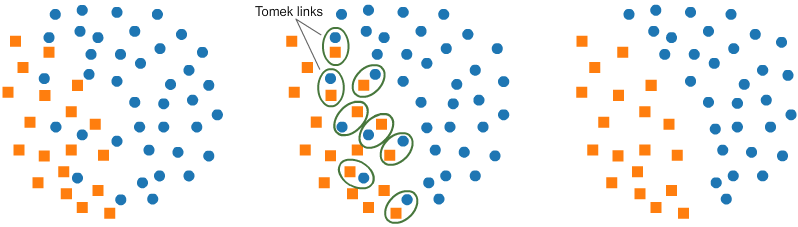

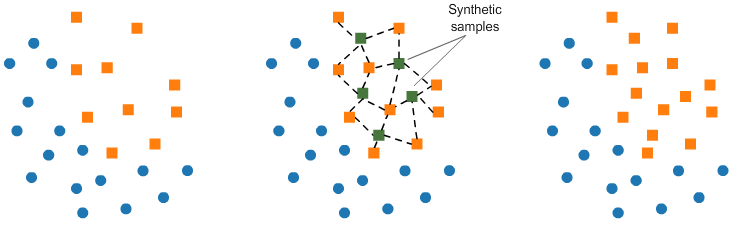

In [82]:
#Undersampling as well as oversampling
smt = SMOTETomek(ratio='auto')
X_smt, y_smt = smt.fit_sample(X_train_tfv, y_train)

In [83]:
#Again fitting the data on training set
clf.fit(X_smt, y_smt)
preds_as = clf.predict(X_valid_tfv)

In [84]:
#Calculating accuracy and F1-score of the oversampled baseline model
acc_as, class_report_as = calculate_accuracy(y_valid, preds_as)
print(acc_as)
print(class_report_as)

0.7865
              precision    recall  f1-score   support

      Label0       0.54      0.10      0.17       433
      Label1       0.80      0.98      0.88      1567

    accuracy                           0.79      2000
   macro avg       0.67      0.54      0.52      2000
weighted avg       0.74      0.79      0.72      2000



Hence we observe that the combination of oversampling and undeersampling techniques gives the best possible result. So we will be using X_smt and y_smt for training.

**Hyperparameter tuning and optimization for RandomForest, MultinomialNB and ComplementNB with cross-validation**:

In [85]:
#Storing the classifiers and accuracy scores in the list
classifiers, acc_scores = [], []

#Using RandomizedSearch CV for training with cross validation
def fine_tune_params(classifier, parameters, X_train, y_train):
  rm = RandomizedSearchCV(estimator=classifier, param_distributions=parameters, n_iter=8, n_jobs=-1, cv=9)
  search = rm.fit(X_train, y_train)
  bs = search.best_score_
  bp = search.best_params_
  return bs, bp

In [86]:
#Custom Test Prediction, for checks
def review(classifier, text, vectorizer):
  new_review = str(text)
  new_review = re.sub('[^a-zA-Z]', ' ', new_review)
  new_review = new_review.lower()
  new_review = new_review.split()
  all_stopwords = stopwords.words('english')
  new_review = [lemmatizer.lemmatize(word) for word in new_review if not word in set(all_stopwords)]
  new_review = ' '.join(new_review)
  new_corpus = [new_review]
  new_X_test = vectorizer.transform(new_corpus).toarray()
  new_y_pred = classifier.predict(new_X_test)

  opinion = " "
  if new_y_pred[0] == 0:
    opinion = "Negative statement or no opinion"
  else:
    opinion = "Positive opinion"

  return opinion

**Random Forest**

In [87]:
#Hyperparameters for fine-tuning RandomForest Classifier
parameters_rm = { 
              "n_estimators" : [int(i) for i in np.linspace(100, 500, 10)],
              "criterion": ['gini', 'entropy'],
              "min_samples_split": [10, 20, 40],
              "max_depth": [2, 6, 8],
              "min_samples_leaf": [20, 40, 100],
              "max_leaf_nodes": [5, 20, 100],
              "bootstrap" : [True, False],
              "max_features" : ['auto', 'sqrt', 'log2']
}

best_score_forest, best_parameters_forest = fine_tune_params(clf, parameters_rm, X_smt, y_smt)

In [88]:
best_parameters_forest

{'bootstrap': False,
 'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'log2',
 'max_leaf_nodes': 5,
 'min_samples_leaf': 20,
 'min_samples_split': 10,
 'n_estimators': 455}

In [89]:
#Fitting the model
clf_ht = RandomForestClassifier(n_estimators=500, criterion='gini', max_depth=8, max_features='log2', bootstrap=False, max_leaf_nodes=5,  min_samples_leaf=40, 
                                min_samples_split=20)
classifiers.append('Random Forest Classifier')

In [90]:
#Printing final predictions after fitting the model, use Stratified K-Fold for removing imbalance
clf_ht.fit(X_smt, y_smt)
preds_forest = clf_ht.predict(X_valid_tfv)

In [91]:
#Accuracy and F1-score
acc_rf, clf_report_forest = calculate_accuracy(y_valid, preds_forest)
acc_scores.append(acc_rf)
print(acc_rf)
print(clf_report_forest)

0.734
              precision    recall  f1-score   support

      Label0       0.34      0.24      0.28       433
      Label1       0.80      0.87      0.84      1567

    accuracy                           0.73      2000
   macro avg       0.57      0.55      0.56      2000
weighted avg       0.70      0.73      0.72      2000



In [96]:
test_data.head()

,Combined_Text,Combined_Tag_Tokens,Title_Noun_Count,Title_Adverb_Count,Title_Adjective_Count,Title_Verb_Count,Jaccard_Index,num_words,num_unique_words,num_chars,num_words_upper,num_words_title,mean_word_len,Label_Final
0,more national discretion supervisory unit RBIh...,"[('more', 'RBR'), ('national', 'JJ'), ('discre...",8,1,6,2,0.133333,17,14,138,2,3,7.176471,0.0
1,Lakshmi Vilas Bank raise Rs 350 cr SeptemberLa...,"[('Lakshmi', 'NNP'), ('Vilas', 'NNP'), ('Bank'...",17,1,0,2,0.352941,22,17,144,2,10,5.590909,1.0
2,IRDAI announce host new norm OctoberIRDAI set ...,"[('IRDAI', 'NNP'), ('announce', 'NN'), ('host'...",11,0,4,4,0.266667,19,15,115,1,0,5.105263,1.0
3,RBI lift restriction FIIs buy share BoBthe Res...,"[('RBI', 'NNP'), ('lift', 'NN'), ('restriction...",17,0,2,2,0.166667,21,17,142,1,4,5.809524,1.0
4,indian Bank Q1 net 4 Rs 215 croreindian Bank t...,"[('indian', 'JJ'), ('Bank', 'NNP'), ('Q1', 'NN...",12,0,5,2,0.333333,27,22,138,1,6,4.148148,1.0


In [99]:
test_data.head()

,Combined_Text,Combined_Tag_Tokens,Title_Noun_Count,Title_Adverb_Count,Title_Adjective_Count,Title_Verb_Count,Jaccard_Index,num_words,num_unique_words,num_chars,num_words_upper,num_words_title,mean_word_len,Label_Final
0,more national discretion supervisory unit RBIh...,"[('more', 'RBR'), ('national', 'JJ'), ('discre...",8,1,6,2,0.133333,17,14,138,2,3,7.176471,0.0
1,Lakshmi Vilas Bank raise Rs 350 cr SeptemberLa...,"[('Lakshmi', 'NNP'), ('Vilas', 'NNP'), ('Bank'...",17,1,0,2,0.352941,22,17,144,2,10,5.590909,1.0
2,IRDAI announce host new norm OctoberIRDAI set ...,"[('IRDAI', 'NNP'), ('announce', 'NN'), ('host'...",11,0,4,4,0.266667,19,15,115,1,0,5.105263,1.0
3,RBI lift restriction FIIs buy share BoBthe Res...,"[('RBI', 'NNP'), ('lift', 'NN'), ('restriction...",17,0,2,2,0.166667,21,17,142,1,4,5.809524,1.0
4,indian Bank Q1 net 4 Rs 215 croreindian Bank t...,"[('indian', 'JJ'), ('Bank', 'NNP'), ('Q1', 'NN...",12,0,5,2,0.333333,27,22,138,1,6,4.148148,1.0


In [95]:
#Fitting the model to the test data
test_predictions_ht = clf_ht.predict(X_test_tfv)

In [ ]:
#Printing out the prediction on a custom sentence
#pred = clf_mnb.predict(tfv.transform(['Stocks jumped today']).toarray())
# text = "Greek crisis prompts SBI to delay $1.5-billion bond sale"
# opinion = review(clf_ht, text, tfv)
# print(opinion)

**MultiNomial NB**

In [ ]:
clf_mnb = MultinomialNB()

In [ ]:
#Hyperparameters for fine-tuning MultiNomial Naive Byes Classifier
parameters_mnb = { 
              "alpha" : [i for i in (0, 1, 0.10)],
              "fit_prior" : [True, False]
}

best_score_mnb, best_parameters_mnb = fine_tune_params(clf_mnb, parameters_mnb, X_smt, y_smt)

In [ ]:
best_parameters_mnb

{'alpha': 0, 'fit_prior': True}

In [ ]:
#Fitting the model, use Stratified K-fold for removing imbalance
clf_mnb = MultinomialNB(alpha=0, fit_prior=True)
clf_mnb.fit(X_smt, y_smt)
classifiers.append('Multinomial NB')

In [ ]:
X_valid

array(['more borrower take private placement route amid liquidity crunchthree month rolling average show April fund raising route higher last year',
       'NDB expects lending double every year K V KamathBank would also see staff strength increased 3 fold going forward',
       'PSBs risk downgrade S Pany sharp deterioration asset quality could weaken bank credit profile',
       ...,
       'Advisory Council 15th Finance Commission meet Thursdaythe meeting chaired chairman Commission N K Singh attended member including A N Jha',
       'Nirav Modi team free run PNB CBI quiz Firestar Vipul Ambaniconniving PNB staff got commission every LoU',
       'Ministry Finance merge two regional rural bank Tamil NaduTamil Nadu Grama Bank reported around Rs 21 000 crore business 625 branch'],
      dtype=object)

In [ ]:
#Printing final predictions of this model
preds_mnb = clf_mnb.predict(X_valid_tfv)

In [ ]:
#Fitting the model to the test data
test_predictions_mnb = clf_mnb.predict(X_test_tfv)

Custom Prediction on a sentence

In [ ]:
#Printing out the prediction on a custom sentence
#pred = clf_mnb.predict(tfv.transform(['Stocks jumped today']).toarray())
#text = "Prices declined today"
#pred = review(clf_mnb, text, tfv)
#if pred[0] == 0:
#   print("Negative statement or no opinion")
#else:
#   print("Positive opinion")
#Use stratified K-Fold Cross Vaildation here to preserve the labels

In [ ]:
#Accuracy and F1-score
acc_mnb, clf_report_mnb = calculate_accuracy(y_valid, preds_mnb)
acc_scores.append(acc_mnb)
print(acc_mnb)
print(clf_report_mnb)

0.7505
              precision    recall  f1-score   support

      Label0       0.35      0.18      0.24       433
      Label1       0.80      0.91      0.85      1567

    accuracy                           0.75      2000
   macro avg       0.58      0.54      0.55      2000
weighted avg       0.70      0.75      0.72      2000



Let's check out if we can leverage meta-features which we have created for our problem actually serve in bettering the model. But also, meta features will still not learn the sequences in the text. We have to apply sequence-based models for our prediction.

In [ ]:
train_data.head()

,Combined_Text,Combined_Tag_Tokens,Title_Noun_Count,Title_Adverb_Count,Title_Adjective_Count,Title_Verb_Count,Jaccard_Index,num_words,num_unique_words,num_chars,num_words_upper,num_words_title,mean_word_len,Phrases,Positive_Hits,Negative_Hits,Label_Final
0,ATMs become virtual bank branch accept deposit...,"[('ATMs', 'NNP'), ('become', 'VBP'), ('virtual...",10,1,2,2,0.041667,25,23,143,0,1,4.760000,"['virtual bank', 'instant creditclose', 'new a...","[1, 1, 3]","[1, 1, 4]",0
1,IDFC First Bank senior forgo 65 bonus amid Cov...,"[('IDFC', 'NNP'), ('First', 'NNP'), ('Bank', '...",13,0,2,4,0.000000,24,24,156,1,4,5.541667,"['senior forgo', 'managing director', 'directo...","[1, 5, 2, 10, 1]","[1, 11, 4, 8, 1]",0
2,huge scam YES Bank many year say Enforcement D...,"[('huge', 'JJ'), ('scam', 'NNS'), ('YES', 'NNP...",9,1,2,3,0.000000,15,15,100,1,3,5.733333,"['huge scam', 'many year', 'also charged']","[1, 1, 1]","[1, 2, 1]",0
3,Bank Maharashtra sanctioned Rs 2 789 cr loan M...,"[('Bank', 'NNP'), ('Maharashtra', 'NNP'), ('sa...",16,0,1,3,0.000000,23,23,157,0,7,5.869565,"['bank said', 'gearing extend', 'package annou...","[11, 1, 1]","[11, 1, 1]",0
4,DCB Bank profit tax decline 37 6 Rs 93 84 cror...,"[('DCB', 'NNP'), ('Bank', 'NNP'), ('profit', '...",16,1,1,2,0.160000,30,24,149,2,5,4.000000,"['profit financial', 'financial year']","[1, 22]","[0, 22]",1


In [ ]:
%cd /content/drive/MyDrive/Datasets/Indian Financial News Headlines/src/models/saved-models-vectorizer

/content/drive/MyDrive/Datasets/Indian Financial News Headlines/src/models/saved models


**Dumping models to file**

In [ ]:
#Saving the model to file
filename = 'finalized_ht.sav'
joblib.dump(clf_ht, filename)

['finalized_ht.sav']

In [ ]:
#Saving the model to file
filename = 'finalized_mnb.sav'
joblib.dump(clf_mnb, filename)

['finalized_mnb.sav']

In [ ]:
#Finally, also saving the vectorizer to file
filename = 'finalized_tfv.sav'
joblib.dump(tfv, filename)

['finalized_tfv.sav']

In [ ]:
nouns_by_label = train_data.groupby('Label_Final')['Title_Noun_Count'].agg(['sum'])
adverbs_by_label = train_data.groupby('Label_Final')['Title_Adverb_Count'].agg(['sum'])
adjectives_by_label = train_data.groupby('Label_Final')['Title_Adjective_Count'].agg(['sum'])

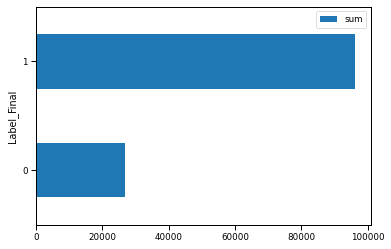

In [ ]:
nouns_by_label.plot(kind='barh')

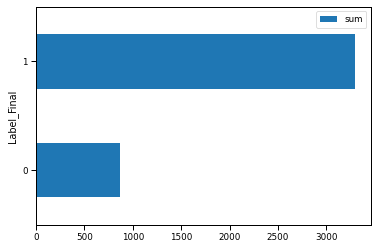

In [ ]:
adverbs_by_label.plot(kind='barh')

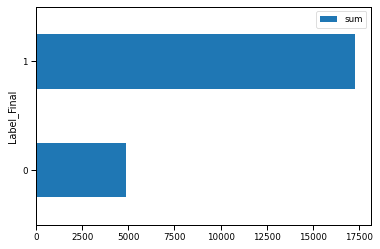

In [ ]:
adjectives_by_label.plot(kind='barh')